# Исследование надёжности заёмщиков

## Описание проекта



Заказчик — кредитный отдел банка. 

Цель исследования: выяснить **влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок**. 

Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Обзор данных

In [1]:
# Импортирую необходимые библиотеки и открываю датасэт 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
try:
    df = pd.read_csv('C:\practicum\data.csv')
except:
    df = pd.read_csv('/datasets/data.csv')
    


In [2]:
#Основная информация о датасэте 
print('information')
display(df.info())
print('description')
display(df.describe())

information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


None

description


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


В таблице 12 столбцов. В стобцах три типа данных: float64, int64, object  
В столбцах days_employed, total_income имеются пропуски.  
Проблем со стилем в названиях нет. 

Описание данных
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита



Странные данные в столбце с трудовым стажем (среднее значение 63 000 дней)

In [3]:
#Обзор датасэта
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


#### Первичные выводы
1. В данных имеются отрицательные и невероятно большие значения в трудовом стаже (думаю, что это может быть связано с ошибкой в программе) 
2. Пропуски в столбцах days_employed и total_income в одних и тех же строках.

## Предобработка данных 

In [4]:
#Пропуски 
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Всего строк 21525, пропущенных значений 2174, доля пропущенных значений 10%

In [5]:
df[df.isna().any(axis=1)].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Пропуски есть только в колонках со стажем и доходом в одних и тех же строках. Думаю они связаны.  
Думаю, надо заменить пропуски на медианные значения, что большие цифры не так сильно влияли 

По хорошему за объянением странностей в датасэте необходимо было бы обратиться к источнику этих данных. Но тк такой возможности нет, то придется воспольховаться логикой и интуицией.

Тк в стаже отрицательные значение невозможны, то **преобразуем из и возьмем значение по модулю**

In [6]:
#Преобразование отрицательных значение в положительные 
df['days_employed'] = abs(df['days_employed'])

In [7]:
#Функция для описания значений в колонке 
def description(column):
    print('min', column.min())
    print('max', column.max())
    print('mean', column.mean())
    print('median', column.median())
    

In [8]:
#Характеристика опыта работы 
description(df['days_employed'])
display(df.nlargest(5, 'days_employed'))
display(df.nsmallest(5, 'days_employed'))

min 24.14163324048118
max 401755.40047533
mean 66914.72890682236
median 2194.220566878695


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью
10006,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования
7664,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
7794,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
17437,1,24.141633,31,среднее,1,женат / замужем,0,F,сотрудник,1,166952.415427,высшее образование
8336,0,24.240695,32,высшее,0,Не женат / не замужем,4,M,сотрудник,0,124115.373655,получение дополнительного образования
6157,2,30.195337,47,среднее,1,гражданский брак,1,M,компаньон,0,231461.185606,свадьба
9683,0,33.520665,43,среднее,1,Не женат / не замужем,4,M,сотрудник,1,128555.897209,приобретение автомобиля
2127,1,34.701045,31,высшее,0,женат / замужем,0,F,компаньон,0,90557.994311,получение образования


Самые большие числа выглядят совсем нереалистичными, больше похоже на "Минут" устроен. 
Самые маленькие числа тоже выглядят нереалистичными, больше похоже на выбросы или на ошибки в программе.  
Причем медианные значение 2200 дней (6 лет), а среднее 67000 (7 000 лет), значит, гигантских значений не сильно много
На первый вгляд, есть взаимосвязь больших значений опыта работы со статусом "пенсионер"

<AxesSubplot:xlabel='days_employed', ylabel='Count'>

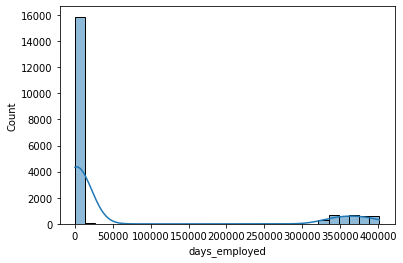

In [9]:
#Гистограмма "Опыт работы"
sns.histplot(data=df, x = 'days_employed', bins=30,  kde=True)

По этой гистограмме видно, что в данных два пика. Реалистичный (до 50000 дней) нереалистичный, скорее всего связанный с ошибкой при сборе данных

In [10]:
# % нереальных значений от датасэта 
print(df.query('days_employed > 17500').count() /  len(df))

children            0.160139
days_employed       0.160139
dob_years           0.160139
education           0.160139
education_id        0.160139
family_status       0.160139
family_status_id    0.160139
gender              0.160139
income_type         0.160139
debt                0.160139
total_income        0.160139
purpose             0.160139
dtype: float64


<AxesSubplot:xlabel='days_employed', ylabel='Count'>

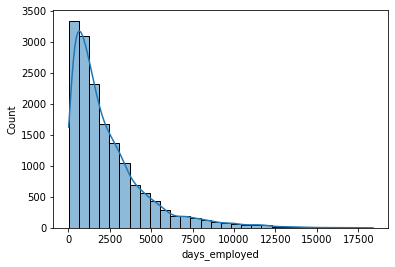

In [11]:
# Гистограмма реалистичной части 
sns.histplot(data=df.query('days_employed < 50000'), x = 'days_employed', bins=30,  kde=True)

В целом, опыт работы до 17500 дней (47 лет), кажется реалистичным. 

In [12]:
#Зависимость опыта работы от типа деятельности 
df.groupby('income_type')['days_employed'].agg('mean')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          3399.896902
компаньон            2111.524398
пенсионер          365003.491245
предприниматель       520.848083
сотрудник            2326.499216
студент               578.751554
Name: days_employed, dtype: float64

Самые большие значения в стаже у пенсионеров и безработных.  
Эти данные сложно как-то интерпретировать и  на что-то заменить, необходимо их запросить повторно.    
Пропуски заполню медианными значениями.   
Данные по трудовому стажу в исследовании взаимосвязи семейного положения и количества детей на факт погашения кредита в срок не столь необходимы, а тк из 16% от датасэта удалить их нельзя

In [13]:
#Характеристика дохода 
print(description(df['total_income']))
display(df.nlargest(5, 'total_income'))
display(df.nsmallest(5, 'total_income'))

min 20667.26379327158
max 2265604.028722744
mean 167422.30220817294
median 145017.93753253992
None


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12412,0,1477.438114,44,высшее,0,женат / замужем,0,M,компаньон,0,2.265604e+06,ремонт жилью
19606,1,2577.664662,39,высшее,0,женат / замужем,0,M,компаньон,1,2.200852e+06,строительство недвижимости
9169,1,5248.554336,35,среднее,1,гражданский брак,1,M,сотрудник,0,1.726276e+06,дополнительное образование
20809,0,4719.273476,61,среднее,1,Не женат / не замужем,4,F,сотрудник,0,1.715018e+06,покупка жилья для семьи
17178,0,5734.127087,42,высшее,0,гражданский брак,1,M,компаньон,0,1.711309e+06,сыграть свадьбу


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
14585,0,359219.059341,57,среднее,1,женат / замужем,0,F,пенсионер,1,20667.263793,недвижимость
13006,0,369708.589113,37,среднее,1,гражданский брак,1,M,пенсионер,0,21205.280566,заняться высшим образованием
16174,1,3642.820023,52,Среднее,1,женат / замужем,0,M,сотрудник,0,21367.648356,приобретение автомобиля
1598,0,359726.104207,68,среднее,1,гражданский брак,1,M,пенсионер,0,21695.101789,на проведение свадьбы
14276,0,346602.453782,61,среднее,1,женат / замужем,0,F,пенсионер,0,21895.614355,недвижимость


На первый взгляд значения дохода реалистичные

<AxesSubplot:xlabel='total_income', ylabel='Count'>

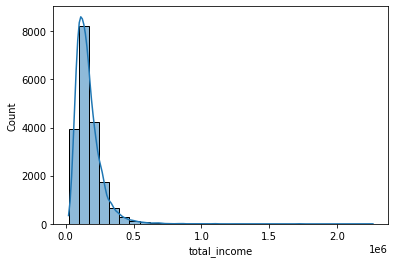

In [14]:
sns.histplot(data=df, x='total_income', bins=30, kde=True)

В целом, данные без особенностей. Кажется есть немного выбросов

children            0.010314
days_employed       0.010314
dob_years           0.010314
education           0.010314
education_id        0.010314
family_status       0.010314
family_status_id    0.010314
gender              0.010314
income_type         0.010314
debt                0.010314
total_income        0.010314
purpose             0.010314
dtype: float64


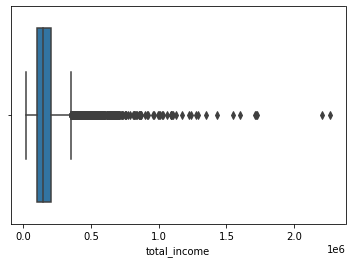

In [15]:
sns.boxplot(df['total_income'])
print(df.query('total_income > 0.5 * 10**6').count()/len(df))

Да, все, что больше 0.5 * 10^6  можно назвать выбросами, это всего 1% от датасэта, можно удалить 


In [16]:
#Зависимость дохода от типа деятельности 
for i in df['income_type'].unique(): 
    print(i, df.loc[df['income_type']==i, 'total_income'].median())

сотрудник 142594.39684740017
пенсионер 118514.48641164352
компаньон 172357.95096577113
госслужащий 150447.9352830068
безработный 131339.7516762103
предприниматель 499163.1449470857
студент 98201.62531401133
в декрете 53829.13072905995


Логично, что размер дохода зависит от типа деятельности. Заменю пропуски медианным значением для типа деятельности. 

In [17]:
# Заполним пропуски в столбце с доходом медианным значением для типа дохода
for i in df['income_type'].unique():
    median = df.loc[df['income_type'] == i, 'total_income'].median()
    df.loc[(df['total_income'].isna())&(df['income_type'] == i), 'total_income'] = median
print(df['total_income'].isna().sum())

0


In [18]:
# Заполним пропуски в столбце с опытом медианным значением
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())
df['days_employed'].isna().sum()

0

In [19]:
# Преобразование значений дохода в целочисленный тип 
df['total_income'] = df['total_income'].astype('int')
df['total_income'].dtypes

dtype('int64')

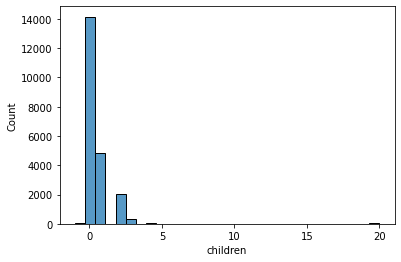

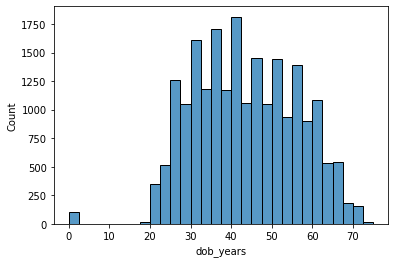

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


In [20]:
#Анализ возраста и количества детей 
for i in ['children', 'dob_years']:
    sns.histplot(data = df, x = i, bins = 30)
    plt.show()
print(df['children'].value_counts())

В колонке дети есть отрицательное значение, скорее всего это сбой в программе и имелось в виду просто 1 ребенок. Тк таких значений немного, заменю их на 1   
Есть выброс в виде 20 детей, таких семей единицы в России, думаю, это связано со сбоем, либо неправильным заполнением данных, мб имелось ввиду 2 детей. Таких значений немного (76), заменю их на 2  

Возраст довольно однороден, похож на нормальное распределение. Есть какие-то младенческие значения, думаю, на уровне выброса 

<AxesSubplot:xlabel='dob_years'>

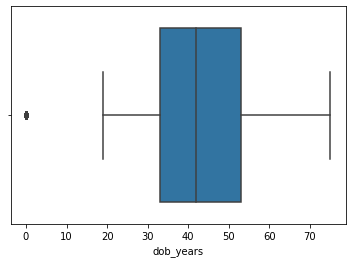

In [21]:
# Проверка вохраста на выбросы 
sns.boxplot(df['dob_years'])

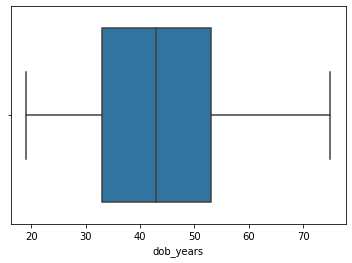

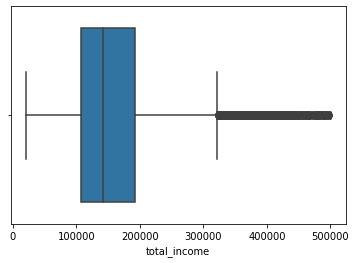

In [22]:
# Замена знаечний 
df = df.replace({'children':{-1:1, 20:2}}) 
# Удаление выбросов 
df = df.query('dob_years > 10 & total_income < 0.5 * 10**6')

for i in ['dob_years', 'total_income']: 
    sns.boxplot(df[i])
    plt.show()

In [23]:
# Характеристика категориальных значений в датасэте
for i in df.columns: 
    if df[i].dtype == object: 
        print()
        print(i)
        print(df[i].value_counts())


education
среднее                13626
высшее                  4555
СРЕДНЕЕ                  768
Среднее                  706
неоконченное высшее      655
ВЫСШЕЕ                   269
Высшее                   259
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

family_status
женат / замужем          12189
гражданский брак          4121
Не женат / не замужем     2772
в разводе                 1170
вдовец / вдова             950
Name: family_status, dtype: int64

gender
F      14074
M       7127
XNA        1
Name: gender, dtype: int64

income_type
сотрудник          10991
компаньон           4949
пенсионер           3817
госслужащий         1439
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64



В колонке пола появилось неожиданное значение XNА, что это значит предположить трудно. Может быть сбой в программе, а может быть так обозначается промежуточный пол, люди бывают разные. Но такое значение всего одно на весь дата-сэт, что не сильно влияет на качество данных.  

В колонке с образованием одно и то же написано в разном регистре, необходимо привести к одному регистру 

В целях покупки написано одно и то же, но разными словами 


In [24]:
#Приведение к одному регистру 
df['education'] = df['education'].str.lower()
df['education'].value_counts()

среднее                15100
высшее                  5083
неоконченное высшее      731
начальное                282
ученая степень             6
Name: education, dtype: int64

In [25]:
# Обработка дубликатов 
print('количество', df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True) 
df.duplicated().sum()

количество 71


0

Я думаю, что главная причина появления подобных дубликатов это человеческий фактор и отсутствие конкретных критериев для заполнения полей
Для поиска и удаления явных дубликатов был использован метод duplicated() и drop_duplicates().reset_index(drop=True) 
Для поиска неявных дубликатов необходимо было выделить уникальные значения колонки и привести их к одному регистру. 

In [26]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


#### Итоги предобработки 

1. Значение опыта работы из отрицательных привела к положительным
2. Заполнила пропуски в опыта работы и доходе медианными значениями. 
3. Изменила количество детей: -1 ребенок стал 1Б а 20 детей превратились в 2 
4. Удалила выбросы в колонке с возрастом и доходом. 
5. Привела значения в образовании к одному регистру 
6. Удалила дубликаты 

## Обработка данных 

### Создание словарей

In [27]:
#Создание словарей 
education_dict = df[['education_id', 'education']].drop_duplicates().reset_index(drop=True)
family_dict = df[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True)
display(education_dict)
display(family_dict)

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [28]:
df = df.drop(columns = ['education', 'family_status'])
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Разбиение уровня дохода по категориям 

<AxesSubplot:xlabel='total_income', ylabel='Density'>

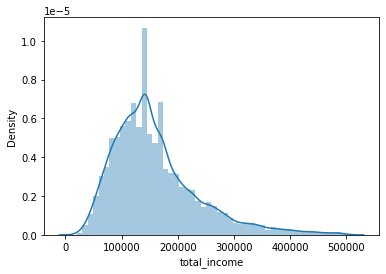

In [29]:
# График доходов
sns.distplot(df['total_income'])

In [30]:
# Разбиение на группы в зависимости от дохода
df['income_category'] = pd.cut(df['total_income'], 5, 
                                labels = ['E, низкий доход', 'D, доход ниже среднего', 'C, средний доход',
                                         'B, доход выше среднего', 'A, высокий доход'])
display(df.groupby('income_category')['total_income'].agg(['mean', 'count']))
df.head()

,mean,count
income_category,,
"E, низкий доход",86329.866729,6453
"D, доход ниже среднего",155772.652488,10532
"C, средний доход",250655.831221,2998
"B, доход выше среднего",347756.120370,864
"A, высокий доход",444643.250000,284


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,"C, средний доход"
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,"E, низкий доход"
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,"D, доход ниже среднего"
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,"C, средний доход"
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,"D, доход ниже среднего"


### Разбиение целей по группам 

In [31]:
df['purpose'].sort_values().unique()

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

In [32]:
# Создание и применение функции
def purpose_category(purpose):
    if 'автомобил' in purpose:
        return 'операции с автомобилем'
    if 'образован' in purpose:
        return 'получение образования'
    if 'недвижимост' in purpose:
        return 'операции с недвижимостью'
    if 'жиль' in purpose:
        return 'операции с недвижимостью'
    return 'проведение свадьбы'
df['purpose_category'] = df['purpose'].apply(purpose_category)
display(df.head())
df['purpose_category'].value_counts()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,"C, средний доход",операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,"E, низкий доход",операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,"D, доход ниже среднего",операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,"C, средний доход",получение образования
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,"D, доход ниже среднего",проведение свадьбы


операции с недвижимостью    10637
операции с автомобилем       4244
получение образования        3961
проведение свадьбы           2289
Name: purpose_category, dtype: int64

## Проверка гипотез 

### Влияние количества детей на погашение кредита 

In [33]:
df.groupby('children')['debt'].agg(['mean', 'sum'])

,mean,sum
children,,
0,0.075517,1049
1,0.091764,439
2,0.095969,200
3,0.083851,27
4,0.097561,4
5,0.000000,0


Логика такая, что если True == 1 это была задолженность. То если мы все сложим и разделим на общее количество себй (т.е. найдем среднее), то получим процент неуплаты в зависимот от категории 

Судя по данным, нужно выдавать кредиты семьям, где 5 детей, у них 100%  но выборка очень мала. Потом идут семьи без детей и тремя детьми, а вероятность неуплаты у семей с 1, 2, 4 детьми примерно одинакова. 

### Зависимость неуплаты кредита и семейного положения.

In [34]:
family_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [35]:
df.groupby('family_status_id')['debt'].agg(['mean', 'sum'])


,mean,sum
family_status_id,,
0,0.075733,920
1,0.093284,382
2,0.065332,62
3,0.071795,84
4,0.097869,271


Наиболее надежные плательщики это вдовцы, а наиболее часто не возвращают кредиты люди в гражданоском браке и те, кто не состоит в браке. 

### Влияние уровня дохода на возвращение кредита в срок.

In [36]:
df.groupby('income_category')['debt'].agg(['mean', 'sum'])


,mean,sum
income_category,,
"E, низкий доход",0.081203,524
"D, доход ниже среднего",0.085359,899
"C, средний доход",0.071381,214
"B, доход выше среднего",0.076389,66
"A, высокий доход",0.056338,16


Логично, что, чем меньше доход, тем больше вероятность, что будет задолженность по кредиту

### Влияние цели кредита на возвращение кредита в срок.

In [37]:
df.groupby('purpose_category')['debt'].agg(['mean', 'sum'])


,mean,sum
purpose_category,,
операции с автомобилем,0.093544,397
операции с недвижимостью,0.072671,773
получение образования,0.092401,366
проведение свадьбы,0.079948,183


Лучше всего возвращают кредиты, взятые для покупки недвижимости.  

# Вывод

В таблице 12 столбцов.
В столбцах days_employed, total_income имеются пропуски.

В начальных данных:
* В данных имелись отрицательные значения в трудовом стаже
* Были положительные значения большие для изменения трудового стажа в днях ( в 4 строчке 340000 дней = 931 год
* Пропуски в столбцах days_employed и total_income в одних и тех же строках.
* В колонке пола было значение XNА.Но такое значение всего одно на весь дата-сэт, что не сильно влияет на качество данных.
* В колонке с количеством детей тоже были аномальные значения: появились значение с -1 ребенком и с 20 детьми. В России по данным 2017 года число семей с 11 и более детьми составляет 929, поэтому вероятнее, что это данные по семьям, где 2 ребенка. А -1 ребенка довольно сложно предстваить. 

Отрицательные значения в данных со стажем можно связать с ошибкой в программе.

Всего строк 21525б, пропущенных значений 2174, доля пропущенных значений 10%

Орицательные значения в трудовом стаже были приведены к положительным по модулю, пропуски не были заполненные так как данные максимально непонятные. 

В колонке с данными доходов пропуски были заполнены медианными значениями, чтобы не было сильно влияния очень низких и очень высоких доходов 

В колонке образования все значения были приведены к регистру, после этого сброшены дубликаты (71), созданы словари к идентификаторам семейного статуса и статуса образования. 

Значения в колонке с целями из множества были приведены к 4:
        * операции с недвижимостью    
        * операции с автомобилем       
        * получение образования        
        * проведение свадьбы          

Заменила количество детей с -1 на 1, с 20 на 2. 

Влияние разных факторов на погашение кредита в срок:  
    * Вдовцы реже имебт задолженности по выплате кредита.   
    * Люди без детей более платежеспособны   
    * Лучше возвращают кредиты, взятые на недвижимость.   
    * Чем меньше задолженность, тем меньше вероятность задолженностей